# House Price Prediction
**- Task:** Build a house price prediction model\
**- Data:** [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## 1 - Import the Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 2 - Load the Dataset

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3 - Prepare the Dataset

### 3.1 Remove Unneccessary Features

In [8]:
df_train = df_train.drop(['Id'], axis = 1)

### 3.2 Check and Remove Duplicates

In [9]:
df_train.duplicated().sum()

0

### 3.3 Handle Missing Data

In [10]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [125]:
# Extract dataset that only includes numerical data

df_train_num = df_train.select_dtypes(include = np.number)
df_train_num.isnull().sum().sort_values(ascending = False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
MSSubClass         0
BedroomAbvGr       0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
EnclosedPorch      0
FullBath           0
HalfBath           0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [126]:
# Drop column with Null

df_train_num_sub = df_train_num.drop(columns = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea'])
x_feature = list(df_train_num_sub.drop(['SalePrice'], axis = 1).columns)

### 3.3 Filter Unwanted Outliers

In [97]:
# TBD

## 4 - Explore the Dataset

In [127]:
# split the data into independent variable and dependent variable

x = df_train_num_sub.drop(['SalePrice'], axis = 1)
y = df_train_num_sub['SalePrice'] 

In [128]:
x.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008


In [129]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [130]:
# Splitting the data into traing for building model and test for predicting and evaluation

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 121)

In [131]:
x_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
446,20,16492,6,6,1966,2002,247,713,557,1517,...,578,0,0,0,0,0,0,0,6,2010
1086,160,1974,4,5,1973,1973,334,0,212,546,...,286,120,96,0,0,0,0,0,5,2010
716,70,10800,7,8,1890,1998,0,0,718,718,...,704,0,48,143,0,0,0,0,7,2007
614,180,1491,4,6,1972,1972,150,480,0,630,...,0,96,24,0,0,0,0,0,5,2010
352,50,9084,5,6,1941,1950,236,380,0,616,...,200,48,0,0,0,0,0,0,3,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,20,12400,6,7,1958,1998,585,0,630,1215,...,297,0,0,0,0,234,0,0,6,2009
65,60,9591,8,5,2004,2005,0,0,1143,1143,...,852,192,151,0,0,0,0,0,10,2007
1288,120,5664,8,5,2000,2000,1158,0,343,1501,...,499,212,59,0,0,0,0,0,10,2009
469,60,9291,6,5,1993,1993,426,0,406,832,...,506,144,70,0,0,0,0,0,6,2008


## 5 - Predict SalePrice
### 5.1 Build Linear Regression Method

In [132]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [133]:
model.intercept_

733757.8012188982

In [134]:
model.coef_

array([-1.63842962e+02,  3.76693184e-01,  1.80176477e+04,  5.48000191e+03,
        3.45049078e+02,  5.91826409e+01,  7.12185537e+00, -1.81771548e+00,
        3.59458932e-01,  5.66359882e+00,  1.79958909e+01,  1.60415987e+01,
       -3.27193948e+00,  3.07655502e+01,  1.15965524e+04,  3.67997552e+03,
        6.82605525e+03, -9.86976540e+02, -1.00511658e+04, -1.73628461e+04,
        6.00656892e+03,  4.80978998e+03,  1.52080920e+04, -1.01817523e+01,
        1.91752625e+01, -2.20814350e+01,  2.83841777e+00,  3.07368491e+01,
        4.71774866e+01, -3.30011760e+01, -6.74710823e-01, -6.92177448e+01,
       -7.97743310e+02])

### 5.2 Check Model with Test Data

In [136]:
y_pred = model.predict(x_test)

### 5.3 Find accuracy/r-square value

In [138]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8427694937295742

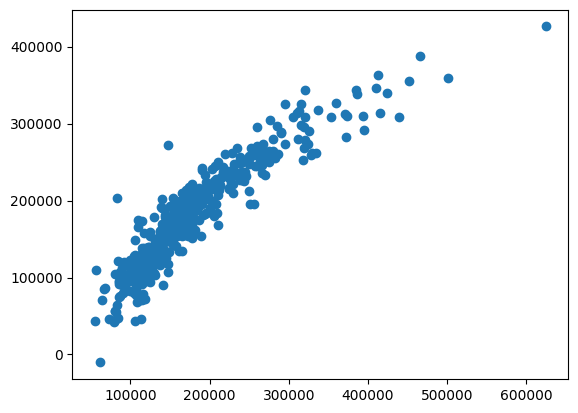

In [116]:
plt.scatter(y_test, y_pred)

## 6 - Submission

In [139]:
df_test_ex = df_test[x_feature]
df_test_ex.isnull().sum().sort_values(ascending = False)

BsmtHalfBath     2
BsmtFullBath     2
TotalBsmtSF      1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
EnclosedPorch    0
WoodDeckSF       0
OpenPorchSF      0
MSSubClass       0
3SsnPorch        0
TotRmsAbvGrd     0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
Fireplaces       0
FullBath         0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
LotArea          0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
YrSold           0
dtype: int64

In [140]:
# Fill NA values with mediumn of the column

df_test_ex = df_test_ex.fillna(df_test_ex.median())
df_test_ex.isnull().sum().sort_values(ascending = False)
df_test_ex

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,9978,6,6,1998,1998,602.0,0.0,324.0,926.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,5005,8,5,1992,1992,263.0,0.0,1017.0,1280.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [141]:
# Make predictions on the test set
pred_test = model.predict(df_test_ex)
pred_test

array([114015.00898796, 148198.35435938, 174085.20036495, ...,
       176676.60273418, 100179.20438577, 258028.58014016])

In [142]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = pred_test
sample_submission.to_csv('submission.csv', index = False)
sample_submission.head()

,Id,SalePrice
0,1461,114015.008988
1,1462,148198.354359
2,1463,174085.200365
3,1464,202727.523214
4,1465,197589.044413
